# Ames Dataset Walkthrough

Steps that I will be taking:
1. Import the dependencies
2. Load the data
3. Preprocess the data
4. Feature Engineer
5. Build the training pipeline
6. Train the Model
7. Test
 

In [1]:
# Import the dependecies

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the data

df = pd.read_csv("train.csv")
df_t = pd.read_csv("test.csv")
df.info

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Ut

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
# profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)  
# profile.to_notebook_iframe()  

Handle Missing Values

In [8]:
# Sum all of the missing values
null_counts = df.isnull().sum()
null_counts = null_counts[null_counts != 0]
null_counts 

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

For each of the categoric values, we change the null values to a new variable ("U")
For each of the numeric values, we change the null values to the mean of the existing data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,U,Reg,Lvl,AllPub,...,0,U,U,U,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,U,Reg,Lvl,AllPub,...,0,U,U,U,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,U,IR1,Lvl,AllPub,...,0,U,U,U,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,U,IR1,Lvl,AllPub,...,0,U,U,U,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,U,IR1,Lvl,AllPub,...,0,U,U,U,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,U,Reg,Lvl,AllPub,...,0,U,U,U,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,U,Reg,Lvl,AllPub,...,0,U,MnPrv,U,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,U,Reg,Lvl,AllPub,...,0,U,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,U,Reg,Lvl,AllPub,...,0,U,U,U,0,4,2010,WD,Normal,142125


In [10]:
# Checking if function worked

null_counts = df.isnull().sum()
null_counts = null_counts[null_counts != 0]

null_counts 

Series([], dtype: int64)

Here, we want to create many visualizations for the data in order to understand it better. We will compare many of the features to the salesprice

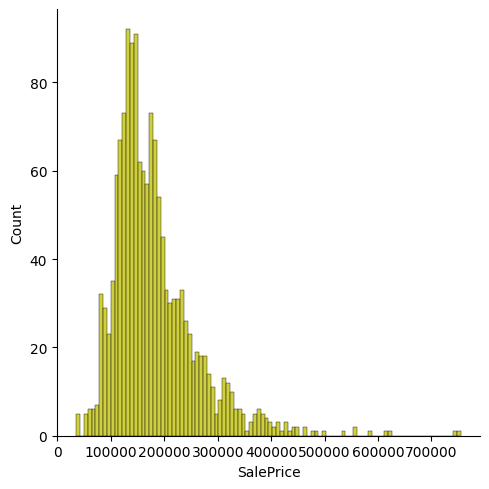

In [11]:
sns.displot(df['SalePrice'], color='y', bins=100);

We note the Bernouli distribution in salesprices

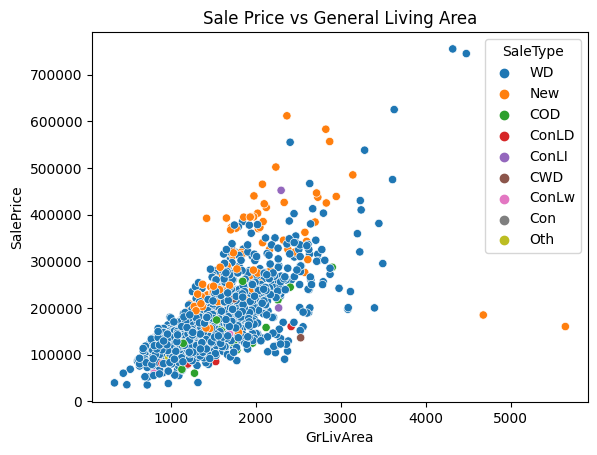

In [12]:
# Sp vs General Living Area
sns.scatterplot(df, y="SalePrice", x="GrLivArea", hue="SaleType")
plt.title("Sale Price vs General Living Area")
plt.show()

We notice two outliers on the bottom right of the graph which we should remove in order to keep the shape of the graph. It is reccommmended to remove any data it is above the 4000 sqare feet GrLivArea

In [13]:
df = df[df.GrLivArea < 4000]

In [14]:
# # Revisualized with Log Transform Sp vs General Living Area
# df.loc[:, "SalePrice"] = np.log1p(df["SalePrice"].values)
# y = df["SalePrice"]

# sns.scatterplot(df, y="SalePrice", x="GrLivArea", hue="SaleType")
# plt.title("Log Transformed Sale Price vs General Living Area")
# plt.show()

Create a function that takes all the categorical variables, maps them to dictionaries, and fills in the dataframe accordingly

In [17]:
def preprocess(df):
    # Drop ID
    df = df.drop('Id', axis=1)
    return df

df = preprocess(df)
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,1,65.0,8450,1,1,1,1,1,1,...,0,1,1,1,0,2,2008,1,1,208500
1,20,1,80.0,9600,1,1,1,1,1,2,...,0,1,1,1,0,5,2007,1,1,181500
2,60,1,68.0,11250,1,1,2,1,1,1,...,0,1,1,1,0,9,2008,1,1,223500
3,70,1,60.0,9550,1,1,2,1,1,3,...,0,1,1,1,0,2,2006,1,2,140000
4,60,1,84.0,14260,1,1,2,1,1,2,...,0,1,1,1,0,12,2008,1,1,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,1,62.0,7917,1,1,1,1,1,1,...,0,1,1,1,0,8,2007,1,1,175000
1456,20,1,85.0,13175,1,1,1,1,1,1,...,0,1,2,1,0,2,2010,1,1,210000
1457,70,1,66.0,9042,1,1,1,1,1,1,...,0,1,4,2,2500,5,2010,1,1,266500
1458,20,1,68.0,9717,1,1,1,1,1,1,...,0,1,1,1,0,4,2010,1,1,142125


In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from xgboost import XGBRegressor

In [19]:
X = df.drop('SalePrice', axis = 1)
y = df["SalePrice"]
# y defined when loaded to avoid log transforming

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=69)


In [20]:
X_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1371,80,1,80.000000,9600,1,1,1,1,1,1,...,178,0,1,2,1,0,10,2008,1,1
715,20,1,78.000000,10140,1,1,1,1,1,1,...,0,0,1,2,1,0,8,2009,1,1
918,60,1,103.000000,13125,1,1,2,1,1,3,...,0,0,1,4,1,0,11,2007,1,1
341,20,5,60.000000,8400,1,1,1,1,1,1,...,0,0,1,1,1,0,9,2009,1,1
1247,80,1,70.049958,12328,1,1,2,1,1,1,...,0,0,1,1,1,0,5,2010,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,60,1,70.049958,10364,1,1,2,1,1,1,...,0,0,1,1,1,0,5,2007,1,1
439,50,1,67.000000,12354,1,2,1,1,1,3,...,0,0,1,4,2,800,8,2009,5,1
620,30,1,45.000000,8248,1,2,1,1,1,1,...,0,0,1,1,1,0,9,2008,1,1
1230,90,1,70.049958,18890,1,1,2,1,1,1,...,0,0,1,1,3,8300,8,2007,1,1


In [21]:
pipeline = Pipeline([
    ('initialprocessing', StandardScaler()),
    ('xgb', XGBClassifier())
])
XGBClassifier().get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [22]:
grid = {'n_estimators': [1, 10, 100, 500, 1000],
        'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3],
        'gamma': [0, 0.1, 0.5, 1, 5, 10],
        'max_depth': [3, 5, 7, 9, 10],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    }

In [23]:
model = GridSearchCV(estimator=XGBClassifier(), param_grid=grid,  cv=5, n_jobs=-1)

In [24]:
model.fit(X_train, y_train)

C:\Users\samin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


ValueError: 
All the 18000 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3600 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\samin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\samin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
  File "C:\Users\samin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py", line 1440, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341
 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359
 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377
 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395
 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413
 414 415 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431
 432 433 434 435 436 437 438 439 440 441 442 443 444 445 446 447 448 449
 450 451 452 453 454 455 456 457 458 459 460 461 462 463 464 465 466 467
 468 469 470 471 472], got [ 34900  37900  39300  40000  52000  55000  58500  60000  61000  62383
  64500  67000  68400  76500  79900  80000  80500  81000  82000  82500
  83000  85000  85400  86000  87000  87500  88000  89000  89471  89500
  90000  90350  91000  92900  93000  93500  94000  94500  94750  95000
  96500  97000  98000  98300  99900 100000 101000 101800 102000 102776
 103000 103200 104000 104900 105000 105500 105900 106000 106250 107000
 107400 107500 107900 108000 108480 108500 109000 109008 109500 109900
 110000 110500 111000 112000 112500 113000 114504 115000 116000 116050
 116500 117000 117500 118000 118400 118500 118964 119000 119500 119750
 119900 120000 120500 121600 122000 122500 123000 123500 123600 124000
 124500 124900 125000 125500 126000 126175 127000 127500 128000 128200
 128500 128900 129000 129500 129900 130000 130500 131000 131500 132000
 132500 133000 133500 133900 134000 134500 135000 135500 135900 135960
 136000 136500 136900 136905 137000 137450 137500 138000 138500 138800
 139000 139400 139500 139600 139900 139950 140000 140200 141000 141500
 142000 142125 142500 143000 143500 144000 144152 144500 144900 145000
 145500 146000 147000 147500 148000 148500 149000 149350 149900 150000
 150500 150750 150900 151000 151400 151500 153500 153575 153900 154000
 154500 154900 155000 156000 156932 157000 157500 157900 158000 158500
 158900 159000 159434 159500 160000 160200 161000 161500 162000 162500
 162900 163000 163500 163900 164000 164500 164700 164900 164990 165000
 165400 165500 165600 166000 167000 167500 167900 168000 168500 169000
 169500 169900 169990 170000 171000 171500 171900 172000 172500 173000
 173733 174000 174500 174900 175000 175900 176000 176485 176500 177000
 177500 178000 178740 178900 179000 179200 179500 179540 179665 179900
 180000 180500 181000 181134 181500 182000 183000 183500 184000 184100
 184900 185000 185750 185850 185900 186000 186500 187000 187500 189000
 189950 190000 191000 192000 192500 193000 193500 194000 194500 195000
 196000 196500 197000 197500 197900 198900 199900 200000 200141 200500
 200624 201000 201800 202500 202665 203000 204750 205000 205950 206000
 207000 207500 208900 210000 211000 212000 213000 213250 213490 213500
 214000 215000 216000 216500 216837 217000 217500 219210 219500 220000
 221000 222000 222500 223500 224000 224900 225000 226000 227000 227680
 228000 228500 229000 229456 230000 231500 232000 232600 233230 234000
 235000 236000 237500 238000 239000 239500 239686 239799 239900 240000
 241000 242000 243000 244000 244400 244600 246578 248000 248900 250000
 251000 252000 252678 254000 255000 255500 256000 257000 257500 258000
 259500 260000 260400 261500 262000 262500 263000 263435 264561 265000
 265900 266000 268000 269500 269790 270000 272000 274000 274725 275000
 276000 277000 277500 278000 279500 280000 281000 281213 283463 284000
 285000 286000 287000 287090 290000 293077 295493 297000 301000 302000
 303477 305000 305900 309000 310000 311500 311872 313000 314813 315000
 316600 317000 318000 319000 320000 325000 325624 326000 328000 328900
 333168 336000 337000 337500 339750 340000 341000 345000 348000 350000
 359100 361919 369900 372500 374000 375000 377500 378500 381000 385000
 386250 392000 392500 394432 394617 395000 395192 402000 403000 415298
 423000 430000 437154 446261 465000 466500 475000 501837 538000 555000
 556581 611657 625000]

--------------------------------------------------------------------------------
3600 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\samin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\samin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
  File "C:\Users\samin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py", line 1440, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341
 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359
 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377
 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395
 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413
 414 415 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431
 432 433 434 435 436 437 438 439 440 441 442 443 444 445 446 447 448 449
 450 451 452 453 454 455 456 457 458 459 460 461 462 463 464 465 466 467
 468 469 470 471 472 473 474 475 476], got [ 34900  37900  39300  40000  52500  55000  58500  60000  61000  66500
  67000  68400  68500  72500  76000  76500  78000  79000  79900  80000
  80500  81000  82000  82500  83500  84000  85000  86000  87000  87500
  88000  89000  89471  89500  90000  90350  91000  91300  91500  92900
  93000  93500  94000  94500  94750  95000  96500  97000  98000  98300
  99500  99900 100000 101000 101800 102000 102776 103200 104900 105000
 105500 105900 106000 106250 106500 107000 107500 108000 108480 108500
 109000 109008 109500 110000 110500 111000 111250 112000 112500 113000
 114504 115000 116000 116500 117000 117500 118000 118400 118500 118964
 119000 119200 119500 119900 120000 120500 121500 121600 122000 122500
 122900 123000 123500 124000 124500 124900 125000 125500 126000 126175
 126500 127000 127500 128000 128200 128500 128900 129000 129500 129900
 130000 130500 131000 131400 131500 132000 132250 132500 133000 133500
 133700 133900 134000 134450 134500 134900 135000 135500 135900 136000
 136500 136900 136905 137000 137450 137500 137900 138000 138500 138800
 138887 139000 139400 139500 139600 139900 139950 140000 140200 141000
 142000 142500 143000 143250 143500 144000 144152 144500 144900 145000
 145500 146000 146500 147000 147500 148000 148500 149000 149300 149350
 149900 150000 150750 150900 151000 151400 151500 152000 153000 153337
 153500 153575 153900 154000 154300 154500 154900 155000 156000 156932
 157000 157500 157900 158000 158500 159000 159434 159500 159950 160000
 160200 161000 161750 162000 162900 163000 163500 164000 164500 164700
 164990 165000 165400 165500 165600 167000 167500 167900 168000 168500
 169000 169500 169900 170000 171000 171500 172000 172400 172500 173000
 173500 173733 174000 174500 175000 175900 176000 176485 176500 177000
 177500 178000 178400 178740 178900 179000 179200 179400 179500 179540
 179600 179665 179900 180000 180500 181000 181134 182000 182900 183000
 184000 184100 185000 185750 185850 186000 186500 187000 187500 188000
 188500 188700 189000 189950 190000 191000 192000 192140 192500 193000
 193500 194000 194500 195000 196000 196500 197000 197500 197900 198900
 200000 200500 201000 202500 202665 203000 204000 204750 205000 206000
 207000 207500 208900 209500 210000 211000 212000 213000 213250 213500
 214000 214900 215000 215200 216000 216837 217000 217500 219210 219500
 220000 221000 222000 222500 223000 223500 224000 224900 225000 226000
 227000 228000 228500 229000 229456 230000 231500 232000 234000 235000
 236000 236500 237000 237500 238000 239000 239500 239686 239799 239900
 240000 241000 241500 242000 243000 244000 245000 246578 248900 250000
 250580 251000 254000 254900 255000 255500 256000 257000 257500 258000
 259500 260000 262000 262500 263435 264132 265000 265900 265979 266000
 267000 268000 269500 269790 270000 271000 272000 274000 275000 277000
 277500 278000 280000 281213 282922 283463 284000 285000 286000 287000
 287090 290000 293077 295493 297000 301000 301500 302000 303477 305000
 305900 306000 309000 310000 311500 311872 313000 314813 315000 316600
 318000 319000 320000 325000 325624 326000 328000 328900 335000 337000
 337500 339750 340000 341000 345000 348000 350000 354000 359100 360000
 361919 367294 369900 374000 377500 378500 381000 385000 386250 392000
 392500 394432 395000 395192 403000 410000 423000 426000 430000 446261
 465000 475000 485000 501837 538000 556581 611657]

--------------------------------------------------------------------------------
3600 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\samin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\samin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
  File "C:\Users\samin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py", line 1440, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341
 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359
 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377
 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395
 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413
 414 415 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431
 432 433 434 435 436 437 438 439 440 441 442 443 444 445 446 447 448 449
 450 451 452 453 454 455 456 457 458 459 460 461 462 463 464 465 466 467
 468 469 470 471 472 473], got [ 34900  37900  39300  40000  52000  52500  55000  58500  60000  62383
  64500  66500  67000  68400  68500  72500  76000  76500  78000  79000
  79900  80000  80500  81000  82000  82500  83000  83500  84000  85000
  85400  86000  87000  87500  88000  89000  89500  90000  91000  91300
  91500  92900  93000  94000  94500  94750  95000  96500  97000  98000
  99500 100000 101800 102000 103000 103200 104000 104900 105000 105500
 105900 106000 106250 106500 107000 107400 107500 107900 108000 108500
 109000 109008 109500 109900 110000 110500 111000 111250 112000 112500
 113000 115000 116000 116050 117000 117500 118000 118500 119000 119200
 119500 119750 119900 120000 120500 121500 121600 122000 122500 122900
 123000 123600 124000 124500 124900 125000 125500 126000 126175 126500
 127000 127500 128000 128200 128500 129000 129500 129900 130000 130500
 131000 131400 131500 132000 132250 132500 133000 133500 133700 133900
 134000 134450 134500 134900 135000 135500 135900 135960 136000 136500
 137000 137450 137500 137900 138000 138500 138800 138887 139000 139400
 139600 139900 140000 141000 141500 142000 142125 142500 143000 143250
 143500 144000 144152 144500 144900 145000 145500 146000 146500 147000
 147500 148000 148500 149000 149300 149350 149900 150000 150500 150750
 151000 151400 151500 152000 153000 153337 153500 153900 154000 154300
 154500 154900 155000 156000 157000 157500 157900 158000 158500 158900
 159000 159500 159950 160000 160200 161000 161500 161750 162000 162500
 162900 163000 163500 163900 164000 164500 164700 164900 164990 165000
 165500 166000 167000 167500 167900 168000 168500 169000 169500 169990
 170000 171000 171900 172000 172400 172500 173000 173500 173733 174000
 174500 174900 175000 175900 176000 176485 176500 177000 177500 178000
 178400 178740 178900 179000 179200 179400 179500 179600 179665 179900
 180000 180500 181000 181500 182000 182900 183000 183500 184000 184900
 185000 185750 185900 186000 186500 187000 187500 188000 188500 188700
 189000 190000 191000 192000 192140 192500 193000 193500 194000 194500
 195000 196000 196500 197000 197500 198900 199900 200000 200141 200500
 200624 201000 201800 202500 203000 204000 204750 205000 205950 207000
 207500 208900 209500 211000 212000 213000 213250 213490 213500 214000
 214900 215000 215200 216000 216500 216837 219500 220000 221000 222000
 222500 223000 223500 224000 224900 225000 226000 227000 227680 228000
 228500 229456 230000 231500 232000 232600 233230 234000 235000 236000
 236500 237000 238000 239000 239500 239686 239799 239900 240000 241500
 242000 243000 244000 244400 244600 245000 248000 248900 250000 250580
 252000 252678 254900 255000 255500 257500 258000 259500 260000 260400
 261500 262000 262500 263000 264132 264561 265000 265900 265979 266000
 267000 269500 270000 271000 272000 274725 275000 276000 277000 277500
 278000 279500 280000 281000 282922 283463 284000 285000 287000 287090
 290000 293077 295493 297000 301500 302000 305900 306000 309000 310000
 315000 316600 317000 318000 319000 320000 325000 328000 328900 333168
 335000 336000 337500 339750 340000 341000 345000 348000 350000 354000
 359100 360000 361919 367294 369900 372500 374000 375000 377500 378500
 381000 385000 386250 392000 392500 394617 395000 395192 402000 403000
 410000 415298 423000 426000 437154 446261 465000 466500 485000 501837
 538000 555000 556581 625000]

--------------------------------------------------------------------------------
3600 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\samin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\samin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
  File "C:\Users\samin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py", line 1440, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341
 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359
 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377
 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395
 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413
 414 415 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431
 432 433 434 435 436 437 438 439 440 441 442 443 444 445 446 447 448 449
 450 451 452 453 454 455 456 457 458 459 460 461 462 463 464 465 466 467
 468 469 470 471 472 473 474 475 476], got [ 34900  37900  39300  40000  52000  52500  55000  58500  60000  61000
  62383  64500  66500  67000  68500  72500  76000  76500  78000  79000
  79900  80000  81000  82000  82500  83000  83500  84000  85000  85400
  86000  87000  88000  89471  89500  90000  90350  91000  91300  91500
  92900  93000  93500  94750  95000  96500  97000  98000  98300  99500
  99900 100000 101000 102000 102776 103000 103200 104000 104900 105000
 105500 106000 106500 107000 107400 107500 107900 108000 108480 109000
 109500 109900 110000 110500 111250 112000 112500 113000 114504 115000
 116000 116050 116500 117000 117500 118000 118400 118500 118964 119000
 119200 119500 119750 119900 120000 120500 121500 122000 122500 122900
 123500 123600 124000 124500 124900 125000 125500 126000 126175 126500
 127000 127500 128000 128500 128900 129000 129500 129900 130000 130500
 131000 131400 131500 132000 132250 132500 133000 133700 133900 134000
 134450 134500 134900 135000 135960 136000 136500 136900 136905 137000
 137450 137500 137900 138000 138500 138800 138887 139000 139400 139500
 139600 139950 140000 140200 141000 141500 142000 142125 142500 143000
 143250 143500 144000 144500 144900 145000 146000 146500 147000 148000
 148500 149000 149300 149900 150000 150500 150900 151000 151400 152000
 153000 153337 153500 153575 153900 154000 154300 155000 156000 156932
 157000 157500 158000 158900 159000 159434 159500 159950 160000 161000
 161500 161750 162000 162500 163000 163500 163900 164000 164500 164700
 164900 164990 165000 165400 165500 165600 166000 167000 167500 167900
 168000 168500 169000 169500 169900 169990 170000 171000 171500 171900
 172000 172400 172500 173000 173500 174000 174900 175000 175900 176000
 176500 177000 177500 178000 178400 178740 178900 179000 179200 179400
 179540 179600 179900 180000 180500 181000 181134 181500 182000 182900
 183500 184000 184100 184900 185000 185750 185850 185900 186000 186500
 187000 187500 188000 188500 188700 189000 189950 190000 191000 192000
 192140 193000 193500 194000 194500 195000 196000 196500 197000 197500
 197900 199900 200000 200141 200500 200624 201000 201800 202500 202665
 203000 204000 205000 205950 206000 207000 207500 208900 209500 210000
 211000 212000 213000 213250 213490 213500 214000 214900 215000 215200
 216500 217000 217500 219210 219500 220000 221000 222000 222500 223000
 223500 224900 225000 226000 227000 227680 228000 228500 229000 229456
 230000 231500 232000 232600 233230 234000 235000 236500 237000 237500
 238000 239000 239500 239686 239799 239900 240000 241000 241500 242000
 244000 244400 244600 245000 246578 248000 250000 250580 251000 252000
 252678 254000 254900 255000 255500 256000 257000 260000 260400 261500
 262000 262500 263000 263435 264132 264561 265900 265979 266000 267000
 268000 269790 270000 271000 272000 274000 274725 275000 276000 277000
 277500 278000 279500 280000 281000 281213 282922 283463 284000 285000
 286000 287000 290000 297000 301000 301500 302000 303477 305000 305900
 306000 310000 311500 311872 313000 314813 315000 316600 317000 318000
 319000 320000 325000 325624 326000 328900 333168 335000 336000 337000
 337500 339750 340000 345000 350000 354000 359100 360000 361919 367294
 372500 375000 378500 381000 385000 386250 392000 394432 394617 395000
 402000 410000 415298 423000 426000 430000 437154 446261 465000 466500
 475000 485000 501837 538000 555000 611657 625000]

--------------------------------------------------------------------------------
3600 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\samin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\samin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
  File "C:\Users\samin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py", line 1440, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341
 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359
 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377
 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395
 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413
 414 415 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431
 432 433 434 435 436 437 438 439 440 441 442 443 444 445 446 447 448 449
 450 451 452 453 454 455 456 457 458 459 460 461 462 463 464 465 466 467
 468 469 470 471 472 473 474 475 476], got [ 52000  52500  55000  60000  61000  62383  64500  66500  67000  68400
  68500  72500  76000  78000  79000  79900  80000  80500  81000  82000
  82500  83000  83500  84000  85000  85400  86000  87000  87500  88000
  89000  89471  89500  90000  90350  91000  91300  91500  93000  93500
  94000  94500  95000  96500  97000  98000  98300  99500  99900 100000
 101000 101800 102000 102776 103000 104000 104900 105000 105900 106000
 106250 106500 107000 107400 107500 107900 108000 108480 108500 109000
 109008 109500 109900 110000 110500 111000 111250 112000 112500 113000
 114504 115000 116000 116050 116500 117000 117500 118000 118400 118500
 118964 119000 119200 119500 119750 120000 120500 121500 121600 122000
 122500 122900 123000 123500 123600 124000 124500 124900 125000 125500
 126000 126500 127000 127500 128000 128200 128500 128900 129000 129500
 129900 130000 130500 131000 131400 131500 132000 132250 132500 133000
 133500 133700 134000 134450 134500 134900 135000 135500 135900 135960
 136000 136500 136900 136905 137000 137500 137900 138000 138500 138887
 139000 139400 139500 139900 139950 140000 140200 141000 141500 142000
 142125 142500 143000 143250 143500 144000 144152 144500 145000 145500
 146000 146500 147000 147500 148000 148500 149000 149300 149350 149900
 150000 150500 150750 150900 151000 151500 152000 153000 153337 153500
 153575 153900 154000 154300 154500 154900 155000 156932 157000 157500
 157900 158000 158500 158900 159000 159434 159500 159950 160000 160200
 161500 161750 162000 162500 162900 163000 163500 163900 164000 164500
 164900 165000 165400 165500 165600 166000 167000 167500 167900 168000
 168500 169500 169900 169990 170000 171000 171500 171900 172400 172500
 173000 173500 173733 174000 174500 174900 175000 175900 176000 176485
 176500 177000 177500 178000 178400 179000 179200 179400 179500 179540
 179600 179665 179900 180000 180500 181000 181134 181500 182900 183000
 183500 184000 184100 184900 185000 185850 185900 186500 187000 187500
 188000 188500 188700 189000 189950 190000 191000 192000 192140 192500
 193000 193500 194000 194500 195000 196000 196500 197000 197500 197900
 198900 199900 200000 200141 200500 200624 201800 202500 202665 203000
 204000 204750 205000 205950 206000 207500 208900 209500 210000 211000
 212000 213000 213490 213500 214000 214900 215000 215200 216000 216500
 216837 217000 217500 219210 219500 220000 221000 222000 222500 223000
 223500 224000 225000 226000 227000 227680 228000 228500 229000 230000
 231500 232000 232600 233230 234000 235000 236000 236500 237000 237500
 239000 240000 241000 241500 242000 243000 244400 244600 245000 246578
 248000 248900 250000 250580 251000 252000 252678 254000 254900 255000
 256000 257000 257500 258000 259500 260000 260400 261500 262500 263000
 263435 264132 264561 265000 265979 266000 267000 268000 269500 269790
 270000 271000 272000 274000 274725 275000 276000 277000 279500 280000
 281000 281213 282922 284000 285000 286000 287000 287090 290000 293077
 295493 301000 301500 302000 303477 305000 306000 309000 310000 311500
 311872 313000 314813 315000 317000 318000 320000 325000 325624 326000
 328000 333168 335000 336000 337000 340000 341000 345000 348000 350000
 354000 360000 367294 369900 372500 374000 375000 377500 385000 392500
 394432 394617 395192 402000 403000 410000 415298 426000 430000 437154
 466500 475000 485000 555000 556581 611657 625000]


In [ ]:
yhat = model.predict(X_train)